In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE


%matplotlib inline

It would be interesting to find out the connection between emergency visits in the year before the hospitalization and such features  as race, gender, age, admission type, time in hospital and  HbA1c test results.

In [2]:
data = pd.read_csv(open("dataset_diabetes/diabetic_data.csv"))

## Emergency visits

In [3]:
#Number of emergency visits of the patient in the year preceding the encounter

n_emergency = np.asarray(data['number_emergency'])
emergency_values = np.unique(n_emergency)

In [4]:
#Age intervals, for example [10, 20)

ages = np.asarray(data["age"])
ages_types = np.unique(ages)

In [5]:
probability = []
for age in ages_types:
    emergency = n_emergency[np.where(ages == age)]
    probability.append(emergency.sum() / len(emergency))
    print(age, emergency.sum() / len(emergency))

[0-10) 0.0310559006211
[10-20) 0.156295224313
[20-30) 0.578153289077
[30-40) 0.490331125828
[40-50) 0.356840474961
[50-60) 0.222473342605
[60-70) 0.162433838901
[70-80) 0.13108025165
[80-90) 0.144269349305
[90-100) 0.13104189044


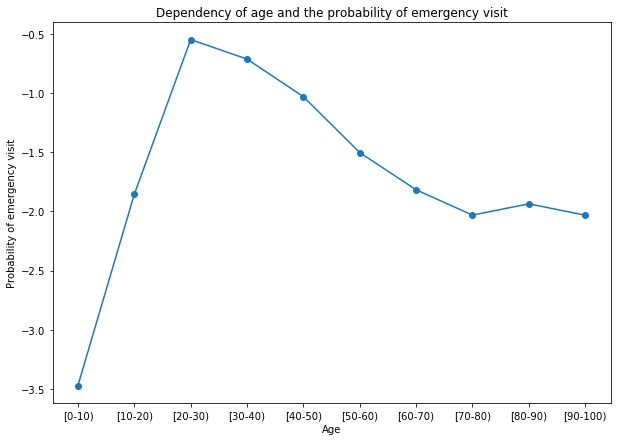

In [6]:
fig = plt.figure(figsize=(10,7))
plt.plot(np.arange(len(ages_types)), np.log(probability), marker='o')
plt.xticks(np.arange(len(ages_types)), ages_types)
plt.title("Dependency of age and the probability of emergency visit")
plt.xlabel("Age")
plt.ylabel("Probability of emergency visit")

In [7]:
LE = LabelEncoder()

In [8]:
s = 0
for column in data.columns:
    LE.fit(data[column])
    data[column] =  s + LE.transform(data[column])
    s += 1

In [9]:
X, y = np.asarray(data[data.columns[2:-1]]), np.asarray(data['readmitted'])

In [87]:
n_components = 2

t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
# print("done in %0.3fs" % (time() - t0))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# print("done in %0.3fs" % (time() - t0)

Projecting the input data on the eigenfaces orthonormal basis


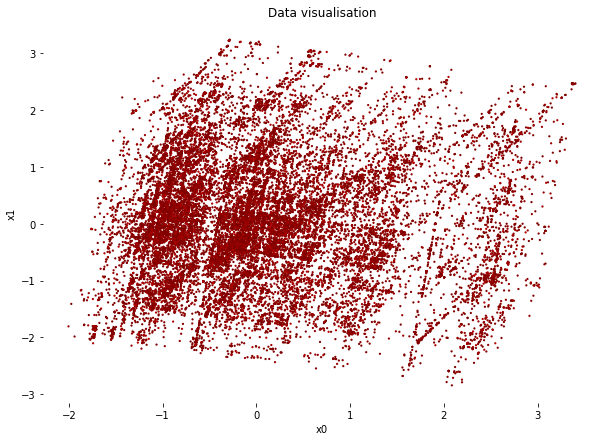

In [91]:
x0 = [x[0] for x in X_train_pca]
x1 = [x[1] for x in X_train_pca]
colors = [cm.jet((y_) / max(y_train)) for y_ in y_train]
plt.figure(figsize=(10, 7))
ax = plt.axes(frameon=False)
plt.scatter(x0, x1, c=colors, edgecolor = 'none', s = 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Data visualisation')

In [ ]:
tsne = TSNE(n_components=3, perplexity=30.0)
tsne.fit(X, y)

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [28]:
OVR = OneVsRestClassifier(estimator=LogisticRegression())

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=1)

In [29]:
OVR.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [77]:
y_pred = OVR.predict(X_test)

KeyboardInterrupt: 

In [33]:
list(y_pred == y_test).count(True) / len(y_test)

0.540547749062987

In [45]:
mlp = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000), max_iter=1000, activation='logistic')

In [53]:
mlp.fit(X_train_pca, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1000, 1000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [55]:
list(mlp.predict(X_test_pca) == y_test).count(True) / len(y_test)

0.5688336117467047

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
AB = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200)

In [68]:
AB.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [69]:
list(AB.predict(X_test) == y_test).count(True) / len(y_test)

0.5770035234498926